x座標：76 y座標：51 width：54 height：55


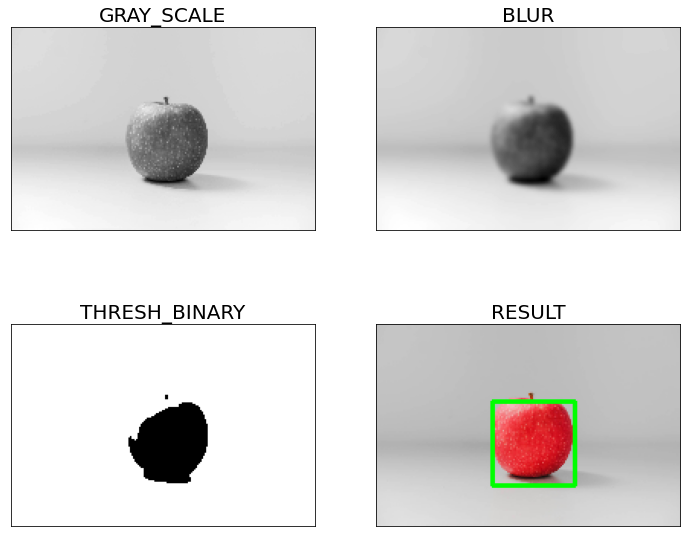

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 画像を読み込んでリサイズ
img = cv2.imread("/content/drive/My Drive/AI/輪郭抽出/apple_sample.jpg") # 画像は任意のファイル
img = cv2.resize(img, (200, 133))

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # グレイスケール化
gray1 = cv2.GaussianBlur(gray, (7, 7), 0) # ぼかし処理
im2 = cv2.threshold(gray1, 140, 240, cv2.THRESH_BINARY)[1] # 二値化

# 輪郭を抽出 
cnts = cv2.findContours(im2, 
        cv2.RETR_LIST,
        cv2.CHAIN_APPROX_SIMPLE)[0]
# 抽出した枠を描画 
for pt in cnts:
    x, y, w, h = cv2.boundingRect(pt)
    # 大きすぎたり小さすぎたり領域を除去
    if w < 30 or w > 150: continue
    # print(x,y,w,h) # 結果を出力
    print('x座標：{} y座標：{} width：{} height：{}'.format(x,y,w,h))
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

num = [1, 2, 3]
result = [gray, gray1, im2]
titles = ['GRAY_SCALE', 'BLUR', 'THRESH_BINARY']

plt.figure(figsize=(12, 10))


for i, x in zip(num, result):
    plt.subplot(2, 2, i)
    plt.title(titles[i-1], fontsize=20) 
    plt.imshow(x, cmap="gray")
    ax = plt.gca()
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)

plt.subplot(2, 2, 4)
plt.title('RESULT', fontsize=20) 
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
# 画像として保存する場合はコメントアウト解除
# plt.savefig("test_result.png", dpi=200) 



113 58 81 73


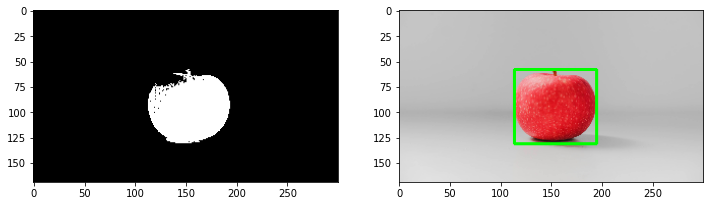

In [ ]:
# 画像を読み込んでリサイズ 
img = cv2.imread("apple_sample.jpg")
img = cv2.resize(img, (200, 133))

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV_FULL) # hsvに変換
h = hsv[:, :, 0]
s = hsv[:, :, 1]
v = hsv[:, :, 2]
# 赤色っぽい色を持つ画素だけを抽出 
img2 = np.zeros(h.shape, dtype=np.uint8)
img2[((h < 50) | (h > 200)) & (s > 100)] = 255

# 色空間を二値化 
im2 = cv2.threshold(img2, 140, 240, cv2.THRESH_BINARY)[1]

# 画面左側に二値化した画像を描画 
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.imshow(im2, cmap="gray")

# 輪郭を抽出 --- (*4)
cnts = cv2.findContours(im2, 
        cv2.RETR_LIST,
        cv2.CHAIN_APPROX_SIMPLE)[0]
# 抽出した枠を描画 --- (*5)
for pt in cnts:
    x, y, w, h = cv2.boundingRect(pt)
    # 大きすぎたり小さすぎたり領域を除去
    if w < 30 or w > 200: continue
    print(x,y,w,h) # 結果を出力
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

# 画面右側に抽出結果を描画 --- (*6)
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.savefig("find_contours.png", dpi=200)
plt.show()



<span>Photo by <a href="https://unsplash.com/@anvision?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">an_vision</a> on <a href="https://unsplash.com/?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Unsplash</a></span>